In [9]:
# Import libraries and define required functions
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sea

# w = weight (i.e. how much weight does X have on the predicted result)
# b = bias (accounts for baseline values in the data that aren't explained solely by input values)
def predict(X, w, b):
  return X * w + b

def loss(X, Y, w, b):
  return np.average((predict(X, w, b) - Y) ** 2)

In [10]:
# Load data from pizza.txt
X, Y = np.loadtxt("pizza.txt", skiprows=1, unpack=True)

In [24]:
# Train
# calculate the correct (or closest possible?) weight from the values in X and Y

# iterations = max number of iterations to determine the weight
# lr = learning rate (step size)
def train(X, Y, iterations, lr) -> tuple[float, float]:
  # starting weight and bias
  w = b = 0
  for i in range(iterations):
    current_loss = loss(X, Y, w, b)
    print("Iteration %4d => Weight: %.6f => Bias: %.6f => Loss: %.6f" % (i, w, b, current_loss))

    # does adding a step to w (weight) reduce the loss?
    if loss(X, Y, w + lr, b) < current_loss:
      w += lr
    # does subtracting a step from w reduce the loss?
    elif loss(X, Y, w - lr, b) < current_loss:
      w -= lr

    # does adding a step to b (bias) reduce the loss?
    if loss(X, Y, w, b + lr) < current_loss:
      b += lr
    # does subtracting a step from b reduce the loss?
    elif loss(X, Y, w, b - lr) < current_loss:
      b -= lr
    # if a step in either direction doesn't improve the loss, return the closest weight and bias we can
    else:
      return w, b
  
  raise Exception("Couldn't converge within %4d iterations" % iterations)

In [27]:
# Train the system
max_iterations = 10_000
learning_rate = 0.01
got_weight, got_bias = train(X, Y, max_iterations, learning_rate)
print("Results:\n  Weight: %.6f\n  Bias: %.6f", got_weight, got_bias)

Iteration    0 => Weight: 0.000000 => Bias: 0.000000 => Loss: 812.866667
Iteration    1 => Weight: 0.010000 => Bias: 0.010000 => Loss: 804.285847
Iteration    2 => Weight: 0.020000 => Bias: 0.020000 => Loss: 795.754053
Iteration    3 => Weight: 0.030000 => Bias: 0.030000 => Loss: 787.271287
Iteration    4 => Weight: 0.040000 => Bias: 0.040000 => Loss: 778.837547
Iteration    5 => Weight: 0.050000 => Bias: 0.050000 => Loss: 770.452833
Iteration    6 => Weight: 0.060000 => Bias: 0.060000 => Loss: 762.117147
Iteration    7 => Weight: 0.070000 => Bias: 0.070000 => Loss: 753.830487
Iteration    8 => Weight: 0.080000 => Bias: 0.080000 => Loss: 745.592853
Iteration    9 => Weight: 0.090000 => Bias: 0.090000 => Loss: 737.404247
Iteration   10 => Weight: 0.100000 => Bias: 0.100000 => Loss: 729.264667
Iteration   11 => Weight: 0.110000 => Bias: 0.110000 => Loss: 721.174113
Iteration   12 => Weight: 0.120000 => Bias: 0.120000 => Loss: 713.132587
Iteration   13 => Weight: 0.130000 => Bias: 0.13000

In [28]:
# Predict the number of pizzas
reservations = 20
print("Prediction: x=%d => y=%.2f" % (reservations, predict(20, got_weight, got_bias)))

Prediction: x=20 => y=34.93


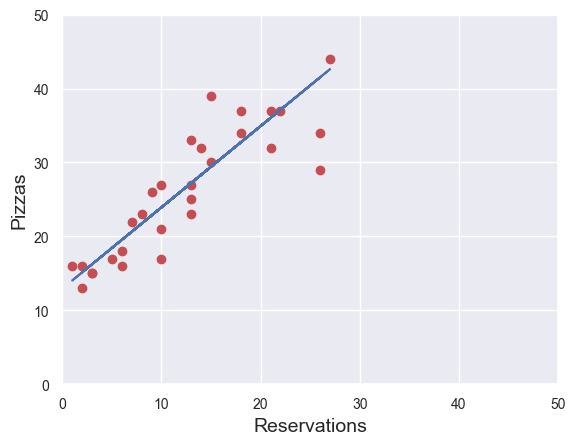

In [ ]:
# Plot the graph with the learned weight and bias
sea.set_theme()
plt.axis([0, 50, 0, 50])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Reservations", fontsize=14)
plt.ylabel("Pizzas", fontsize=14)
plt.plot(X, Y, "ro")
plt.plot(X, predict(X, got_weight, got_bias))
# plt.show()